# CVD Dataset: Ready-to-Run Analysis in Google Colab

This notebook helps you:
1) Upload `CVD_cleaned.csv`
2) Explore & visualize the data
3) Run basic risk-factor analyses
4) Train ML models to predict **Heart_Disease**

**How to use in Colab**
1. Open https://colab.research.google.com/
2. `File → Upload notebook` and select this file.
3. Run each cell top-to-bottom.
4. When prompted, upload your `CVD_cleaned.csv`.

In [1]:
# Imports
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             roc_auc_score, RocCurveDisplay)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

## 1) Upload your CSV

In [6]:
# If running in Colab, use this to upload the file
try:
    from google.colab import files
    uploaded = files.upload()  # choose CVD_cleaned.csv
    csv_name = list(uploaded.keys())[0]
except Exception:
    # Fallback if not in Colab (e.g., running locally/Jupyter)
    csv_name = '/content/CVD_cleaned.csv'  # ensure the file is in the working directory

df = pd.read_csv(csv_name)
df.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


## 2) Quick data overview

In [7]:
# Shape, columns, types
print('Shape:', df.shape)
print('\nColumns:', list(df.columns))
print('\nInfo:')
print(df.dtypes)

print('\nMissing values per column:')
print(df.isna().sum())

# Basic stats for numeric columns
display(df.select_dtypes(include=[np.number]).describe().T)

Shape: (308854, 19)

Columns: ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

Info:
General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consum

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


## 3) Basic cleaning (optional)

In [8]:
# Ensure obvious numeric columns are numeric (if any were read as object)
numeric_like = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for col in numeric_like:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing target if any
if 'Heart_Disease' in df.columns:
    df = df.dropna(subset=['Heart_Disease']).copy()

print('Rows after cleaning:', df.shape[0])

Rows after cleaning: 308854


## 4) Visual exploration

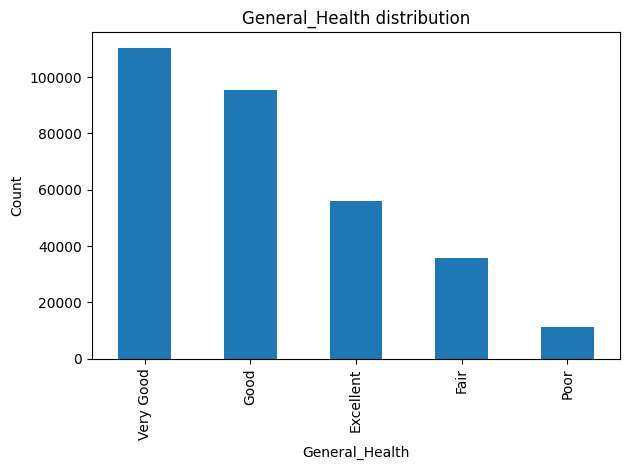

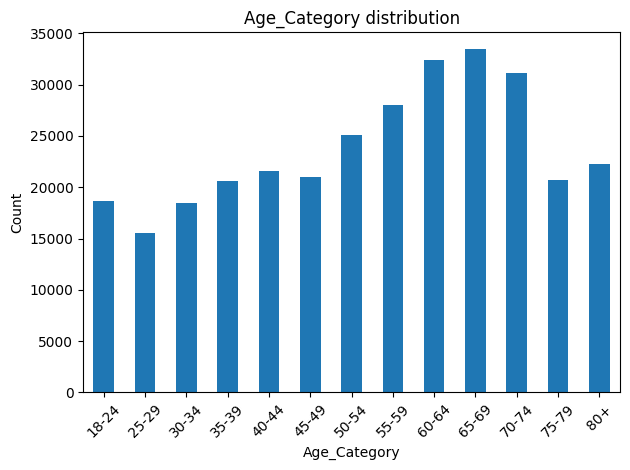

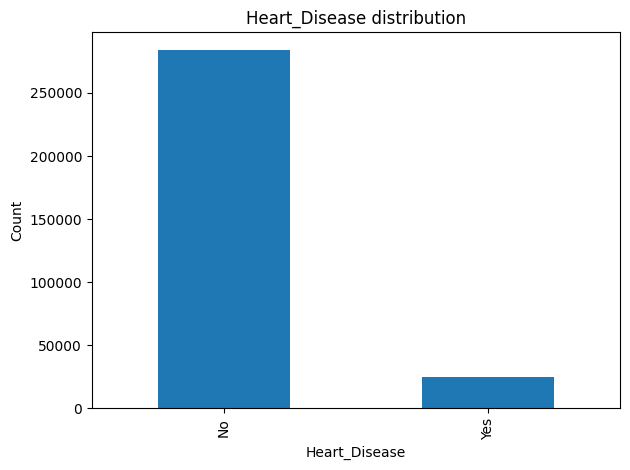

In [9]:
# 4a) Distribution of General_Health
if 'General_Health' in df.columns:
    counts = df['General_Health'].value_counts()
    plt.figure()
    counts.plot(kind='bar')
    plt.title('General_Health distribution')
    plt.xlabel('General_Health')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# 4b) Age distribution
if 'Age_Category' in df.columns:
    order = sorted(df['Age_Category'].unique().tolist())
    counts = df['Age_Category'].value_counts().reindex(order)
    plt.figure()
    counts.plot(kind='bar')
    plt.title('Age_Category distribution')
    plt.xlabel('Age_Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4c) Heart_Disease rate overall
if 'Heart_Disease' in df.columns:
    counts = df['Heart_Disease'].value_counts()
    plt.figure()
    counts.plot(kind='bar')
    plt.title('Heart_Disease distribution')
    plt.xlabel('Heart_Disease')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

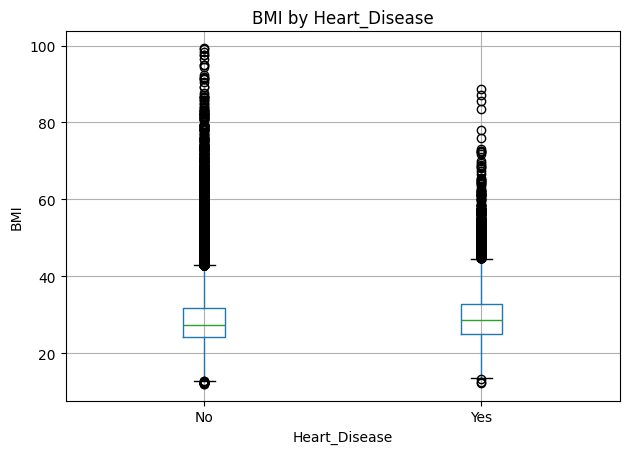

In [10]:
# 4d) BMI vs Heart_Disease
if set(['BMI','Heart_Disease']).issubset(df.columns):
    plt.figure()
    df.boxplot(column='BMI', by='Heart_Disease')
    plt.suptitle('')
    plt.title('BMI by Heart_Disease')
    plt.xlabel('Heart_Disease')
    plt.ylabel('BMI')
    plt.tight_layout()
    plt.show()

Heart_Disease,No,Yes
Exercise,,
No,87.04,12.96
Yes,93.33,6.67


<Figure size 640x480 with 0 Axes>

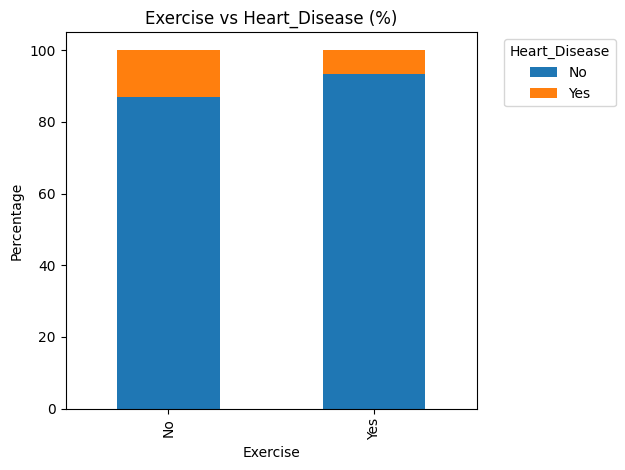

In [11]:
# 4e) Crosstab: Exercise vs Heart_Disease
if set(['Exercise','Heart_Disease']).issubset(df.columns):
    ct = pd.crosstab(df['Exercise'], df['Heart_Disease'], normalize='index') * 100
    display(ct.round(2))

    # Plot stacked bars
    plt.figure()
    ct.plot(kind='bar', stacked=True)
    plt.title('Exercise vs Heart_Disease (%)')
    plt.xlabel('Exercise')
    plt.ylabel('Percentage')
    plt.legend(title='Heart_Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

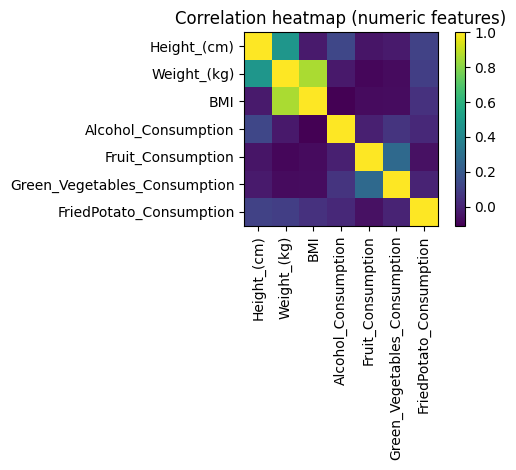

In [12]:
# 4f) Correlation heatmap for numeric columns
num_df = df.select_dtypes(include=[np.number])
if num_df.shape[1] >= 2:
    corr = num_df.corr()
    plt.figure()
    im = plt.imshow(corr, interpolation='nearest')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title('Correlation heatmap (numeric features)')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a heatmap.')

## 5) Machine learning: predict **Heart_Disease**

In [13]:
# Prepare features/target
assert 'Heart_Disease' in df.columns, 'Heart_Disease column not found.'
y = df['Heart_Disease'].astype(str)
X = df.drop(columns=['Heart_Disease'])

# Identify categorical vs numeric columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print('Categorical columns:', cat_cols)
print('Numeric columns:', num_cols)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Categorical columns: ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
Numeric columns: ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']



=== LogisticRegression ===
              precision    recall  f1-score   support

          No       0.92      0.99      0.96     56777
         Yes       0.51      0.06      0.11      4994

    accuracy                           0.92     61771
   macro avg       0.72      0.53      0.53     61771
weighted avg       0.89      0.92      0.89     61771

ROC-AUC: 0.839


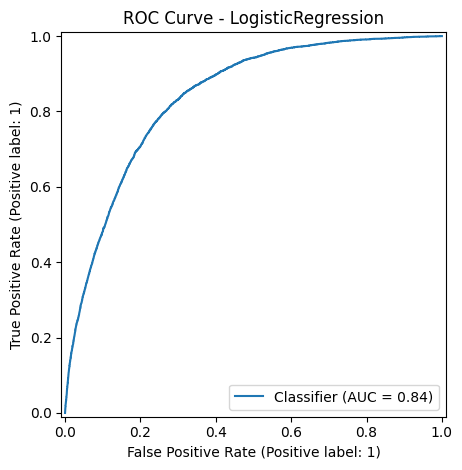


=== RandomForest ===
              precision    recall  f1-score   support

          No       0.92      0.99      0.96     56777
         Yes       0.47      0.05      0.09      4994

    accuracy                           0.92     61771
   macro avg       0.69      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771

ROC-AUC: 0.8129


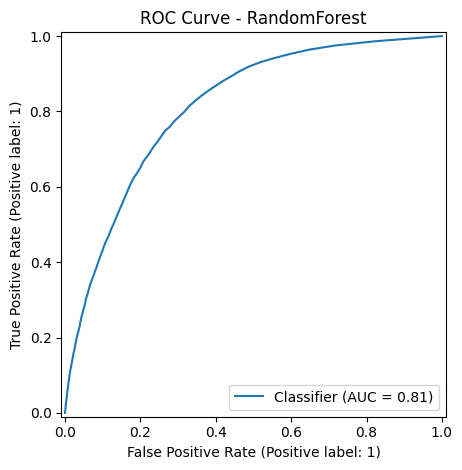

In [20]:
# Preprocess + Model pipelines
import sklearn
from sklearn.preprocessing import OneHotEncoder

if sklearn.__version__ >= "1.2":
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


pre = ColumnTransformer([
    ('cat', ohe, cat_cols),
    ('num', 'passthrough', num_cols)
])

log_reg = Pipeline([
    ('pre', pre),
    ('clf', LogisticRegression(max_iter=1000))
])

rf = Pipeline([
    ('pre', pre),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

models = {'LogisticRegression': log_reg, 'RandomForest': rf}

for name, pipe in models.items():
    print(f'\n=== {name} ===')
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    print(classification_report(y_test, pred))

    # ROC-AUC (needs positive label == 'Yes' if present)
    if hasattr(pipe, 'predict_proba'):
        try:
            proba = pipe.predict_proba(X_test)[:, 1]
            # map y_test to 0/1 if labels are Yes/No
            y_bin = (y_test.str.lower().str.strip() == 'yes').astype(int)
            auc = roc_auc_score(y_bin, proba)
            print('ROC-AUC:', round(auc, 4))
            RocCurveDisplay.from_predictions(y_bin, proba)
            plt.title(f'ROC Curve - {name}')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print('ROC plot skipped:', e)

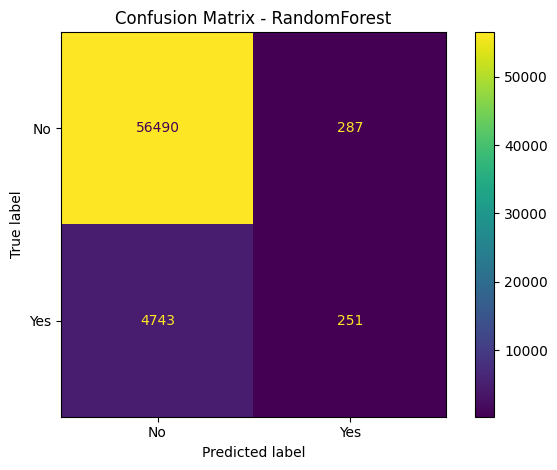

In [21]:
# Confusion matrix for the best model (RandomForest)
best_pipe = rf.fit(X_train, y_train)
pred = best_pipe.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=sorted(y_test.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
disp.plot()
plt.title('Confusion Matrix - RandomForest')
plt.tight_layout()
plt.show()

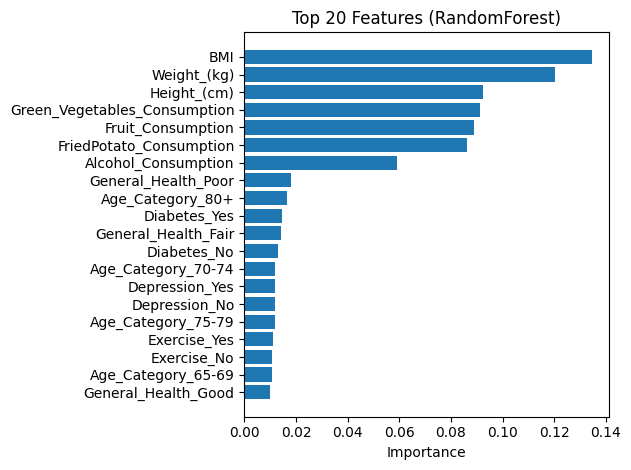

In [22]:
# Feature importance (top 20) for RandomForest
try:
    # Extract feature names after preprocessing
    ohe_ftrs = best_pipe.named_steps['pre'].named_transformers_['cat'].get_feature_names_out(cat_cols)
    feature_names = np.r_[ohe_ftrs, num_cols]
    importances = best_pipe.named_steps['clf'].feature_importances_
    idx = np.argsort(importances)[-20:]
    plt.figure()
    plt.barh(range(len(idx)), importances[idx])
    plt.yticks(range(len(idx)), feature_names[idx])
    plt.xlabel('Importance')
    plt.title('Top 20 Features (RandomForest)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Feature importance skipped:', e)

In [23]:
import sklearn
from sklearn.preprocessing import OneHotEncoder

if sklearn.__version__ >= "1.2":
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)


In [24]:
y.value_counts(normalize=True).rename('proportion')


,proportion
Heart_Disease,
No,0.91915
Yes,0.08085


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pre = ColumnTransformer([
    ('cat', ohe, cat_cols),
    ('num', 'passthrough', num_cols)
])

log_reg_bal = Pipeline([
    ('pre', pre),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

rf_bal = Pipeline([
    ('pre', pre),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1, class_weight='balanced'))
])


## 6) Next steps (ideas)
- Try other models (XGBoost, Gradient Boosting)
- Perform cross-validation & hyperparameter tuning (GridSearchCV)
- Balance classes if imbalanced (class_weight='balanced' or SMOTE)
- Add domain-specific features (e.g., BMI categories)
- Export the trained model with `joblib.dump(...)`

In [26]:
!pip -q install imbalanced-learn
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_pre = ColumnTransformer([
    ('cat', ohe, cat_cols),
    ('num', 'passthrough', num_cols)
])

rf_smote = ImbPipeline([
    ('pre', smote_pre),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))
])


In [27]:
import numpy as np

def bmi_bin(bmi):
    if pd.isna(bmi): return np.nan
    if bmi < 18.5:   return 'underweight'
    if bmi < 25:     return 'normal'
    if bmi < 30:     return 'overweight'
    return 'obese'

if 'BMI' in df.columns:
    df['BMI_cat'] = df['BMI'].apply(bmi_bin)
    # re-split data to include the new feature
    y = df['Heart_Disease'].astype(str)
    X = df.drop(columns=['Heart_Disease'])
    cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best (CV) AUC on subset: 0.8242
Best params: {'clf__max_depth': None, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 5, 'clf__n_estimators': 151}
Test AUC: 0.8312638850859366
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     56777
           1       0.29      0.48      0.36      4994

    accuracy                           0.86     61771
   macro avg       0.62      0.69      0.64     61771
weighted avg       0.90      0.86      0.88     61771



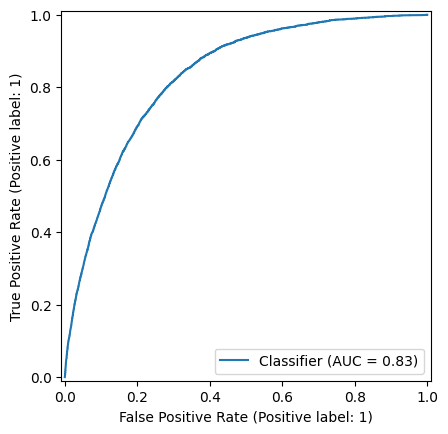

In [32]:
# 0) imports
import numpy as np, sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, RocCurveDisplay
from scipy.stats import randint

# 1) target and features
y = (df['Heart_Disease'].astype(str).str.strip().str.lower() == 'yes').astype(int)
X = df.drop(columns=['Heart_Disease'])

# 2) column splits + encoder (sklearn version safe)
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) if sklearn.__version__ >= "1.2" \
     else OneHotEncoder(handle_unknown='ignore', sparse=False)

pre = ColumnTransformer([('cat', ohe, cat_cols), ('num', 'passthrough', num_cols)])

# 3) split once
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 4) tune on a stratified SUBSET (e.g., 60k rows). Adjust 60000 if you like.
frac = min(60000 / X_train.shape[0], 1.0)
X_tune, _, y_tune, _ = train_test_split(
    X_train, y_train, train_size=frac, stratify=y_train, random_state=42
)

# 5) pipeline
rf_pipe = Pipeline([
    ('pre', pre),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'))
])

# 6) lightweight randomized search (12 trials, 3-fold CV)
param_dist = {
    'clf__n_estimators': randint(150, 450),
    'clf__max_depth': [None, 8, 12, 16, 20],
    'clf__min_samples_split': randint(2, 12),
    'clf__min_samples_leaf': randint(1, 5),
    'clf__max_features': ['sqrt', 'log2', None]
}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    rf_pipe, param_distributions=param_dist, n_iter=12,
    scoring='roc_auc', cv=cv, n_jobs=-1, random_state=42, verbose=1
)
search.fit(X_tune, y_tune)
print("Best (CV) AUC on subset:", round(search.best_score_, 4))
print("Best params:", search.best_params_)

# 7) REFIT the best params on the FULL training set
best_rf = search.best_estimator_.fit(X_train, y_train)

# 8) evaluate once on held-out test
proba_test = best_rf.predict_proba(X_test)[:, 1]
print("Test AUC:", roc_auc_score(y_test, proba_test))
print(classification_report(y_test, best_rf.predict(X_test)))
RocCurveDisplay.from_predictions(y_test, proba_test);


y_test classes: [0 1]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56777
           1       0.52      0.05      0.08      4994

    accuracy                           0.92     61771
   macro avg       0.72      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771

XGB Test AUC: 0.8401


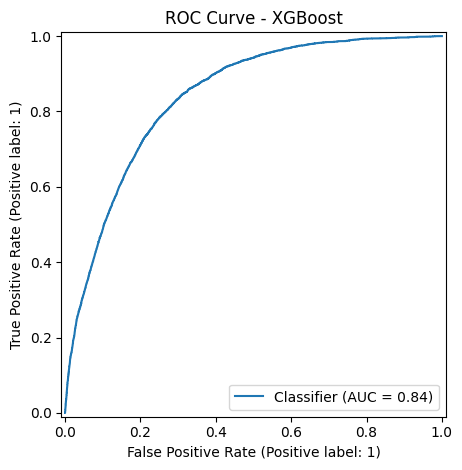

In [34]:
from sklearn.metrics import roc_auc_score, classification_report, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt

# predictions
pred  = xgb_pipe.predict(X_test)
proba = xgb_pipe.predict_proba(X_test)[:, 1]  # prob of class 1

# sanity: y_test should be 0/1
print("y_test classes:", np.unique(y_test))

print(classification_report(y_test, pred))
auc = roc_auc_score(y_test, proba)
print("XGB Test AUC:", round(auc, 4))

RocCurveDisplay.from_predictions(y_test, proba)
plt.title("ROC Curve - XGBoost")
plt.tight_layout(); plt.show()


In [35]:
import joblib

# choose your best pipeline object, e.g., best_rf or xgb_pipe
joblib.dump(best_rf, 'heart_disease_model.joblib')
joblib.dump(pre, 'preprocessor.joblib')  # optional separate preprocessor

# later / in another notebook
clf = joblib.load('heart_disease_model.joblib')
# predict on new data frame "new_df" with same columns as X
# preds = clf.predict(new_df)


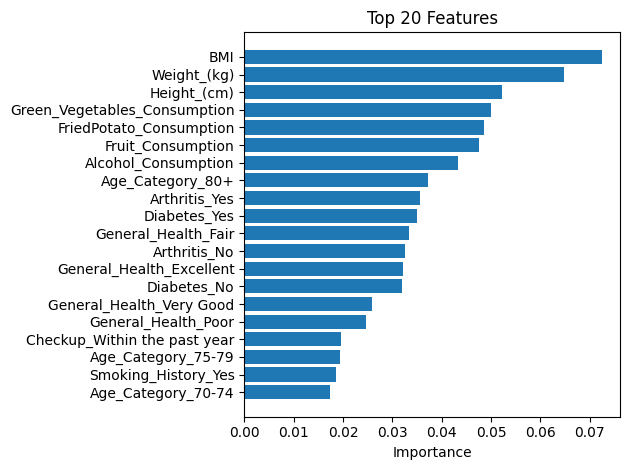

In [36]:
# Works for RandomForest or XGB after fit
def show_top_importances(fitted_pipe, topk=20):
    pre = fitted_pipe.named_steps['pre']
    clf = fitted_pipe.named_steps['clf']
    ohe_ftrs = pre.named_transformers_['cat'].get_feature_names_out(cat_cols)
    feature_names = np.r_[ohe_ftrs, num_cols]
    importances = getattr(clf, 'feature_importances_', None)
    if importances is None:
        print("This model doesn't expose feature_importances_.")
        return
    idx = np.argsort(importances)[-topk:]
    plt.figure()
    plt.barh(range(len(idx)), importances[idx])
    plt.yticks(range(len(idx)), feature_names[idx])
    plt.xlabel('Importance'); plt.title(f'Top {topk} Features')
    plt.tight_layout(); plt.show()

show_top_importances(best_rf, topk=20)  # or xgb_pipe
